# Session 8 :  

## Red Wine Quality  - Multi Linear Regression


###   About the data set

**This data frame contains following columns**

- fixed acidity : the total concentration of acids that are not volatile, meaning they do not evaporate readily.
- volatile acidity : concentration of acetic acid and other volatile acids such as lactic, formic, and butyric acids.
- citric acid : a weak organic acid that is naturally present in small amounts in wine.
- residual sugar :  the amount of sugar that remains unfermented in the finished wine.
- chlorides : the concentration of chloride ions, which are a type of salt that can be naturally present in grapes and soil.
- free sulfur dioxide : the molecular form of SO2 that is present in the wine and is not bound to other molecules.
- total sulfur dioxide : the combined amount of free SO2 and bound SO2 that is present in the wine.
- density : the mass of the wine per unit volume, typically expressed in grams per milliliter (g/mL) or kilograms per liter (kg/L).
- pH : a measure of the acidity or alkalinity of a solution and is defined as the negative logarithm (base 10) of the concentration of hydrogen ions (H+) in the solution.
- sulphates : the presence of sulfur-containing compounds, such as potassium bisulfite (KHSO3) or sodium metabisulfite (Na2S2O5), which are often added to wine as a preservative to prevent oxidation and microbial spoilage.
- alcohol : the presence of sulfur-containing compounds, such as potassium bisulfite (KHSO3) or sodium metabisulfite (Na2S2O5), which are often added to wine as a preservative to prevent oxidation and microbial spoilage.
- quality : quality of wine


## Data loading

In [3]:
import numpy as np
import pandas as pd
import pylab as plt
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import statsmodels.api as sm
from sklearn.metrics import r2_score
from sklearn.feature_selection import mutual_info_regression


# Read data set
from google.colab import drive
drive.mount('/gdrive')
data = pd.read_csv('/content/winequality-red (1).csv', sep=";")
data_Y = data.loc[:,['quality']]
data_X = data.drop(columns=["quality"])

# Check shape
data.shape

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


(1599, 12)

## Data Analysis

Let's start with a statistical analysis

In [4]:
#We can check the statistical summary of the dataframe
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


## Data Distribution

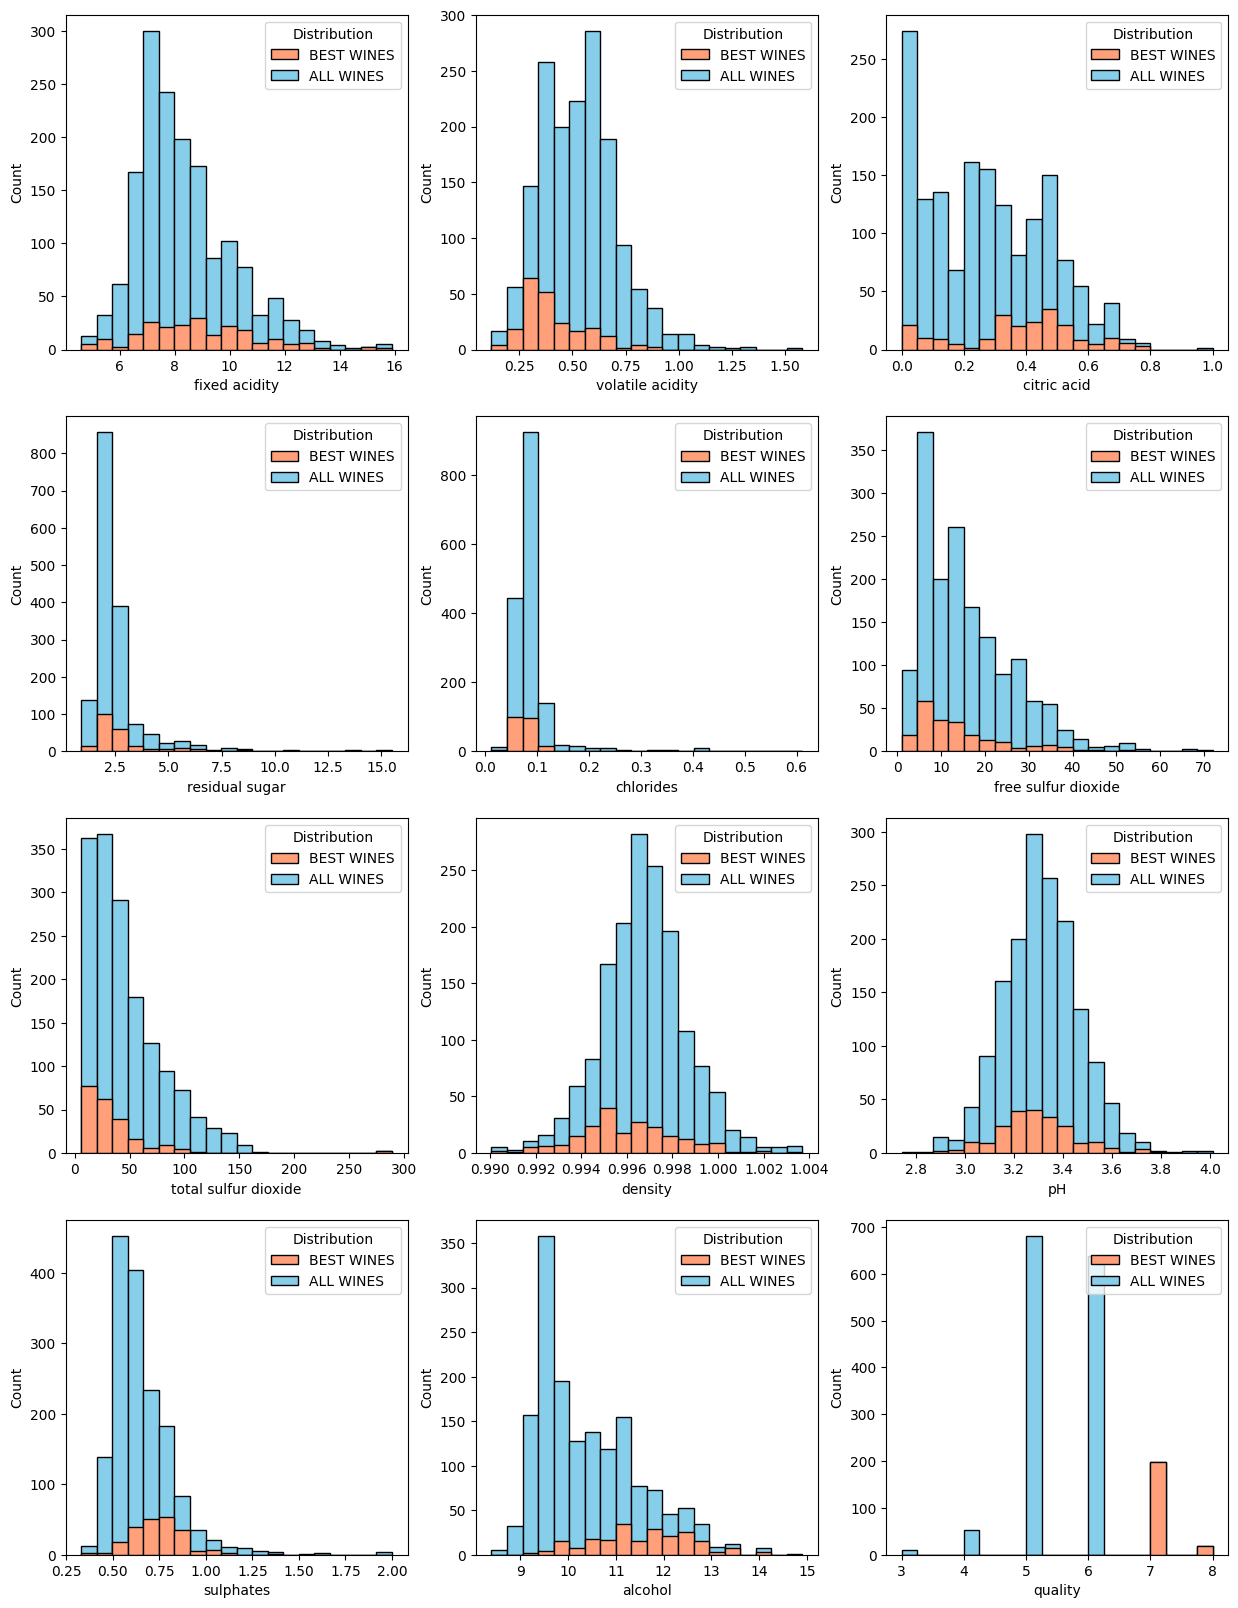

In [5]:
# Filter the data to get only wines with quality greater than or equal to 7
best_wines = data[data["quality"] >= 7]

# Define the number of rows and columns for the subplot grid
nrow = 4
ncol = 3

# Create a figure and an array of subplots with the specified number of rows and columns
fig, axs = plt.subplots(nrow, ncol, figsize=(5 * ncol, 5 * nrow))

# Combine the original data with a new column indicating whether each row is from all wines or best wines
plot_data = pd.concat([
    pd.concat([data.reset_index(drop=True), pd.Series(["ALL WINES"] * len(data), name="Distribution")], axis=1),
    pd.concat([best_wines.reset_index(drop=True), pd.Series(["BEST WINES"] * len(best_wines), name="Distribution")], axis=1)
], axis=0).reset_index(drop=True).sort_values("Distribution", ascending=False)

# Iterate over each subplot in the grid
for i in range(nrow):
    for j in range(ncol):
        # Plot a histogram for the specified data in the current subplot
        sns.histplot(
            plot_data,
            x=plot_data.columns[i * ncol + j],  # Specify the data column for the histogram
            ax=axs[i][j],  # Specify the current subplot
            bins=20,  # Specify the number of bins for the histogram
            hue="Distribution",  # Specify the column used for coloring the histogram
            alpha=1,  # Specify the transparency level of the histogram bars
            palette=["lightsalmon", "skyblue"]  # Specify the colors for different distributions
        )


In [6]:
# Filter the data to include only rows where the "citric acid" column is equal to 0
subset = data[data["citric acid"] == 0]

# Perform descriptive statistics on the "quality" column of the subset
subset["quality"].describe()


count    132.000000
mean       5.409091
std        0.809811
min        3.000000
25%        5.000000
50%        5.000000
75%        6.000000
max        7.000000
Name: quality, dtype: float64

In [7]:
data.shape

(1599, 12)

We can see that the best wines tends to have higher alcohol, sulphates, citric acid and lower volatile acidity rates than other wines

In [8]:
#We check missing values in the dataset
data.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

There is no missing data in our dataset.

We then check the variables'distribution

Let's check if we can spot a linear relationship between our  target (quality) and any other variable

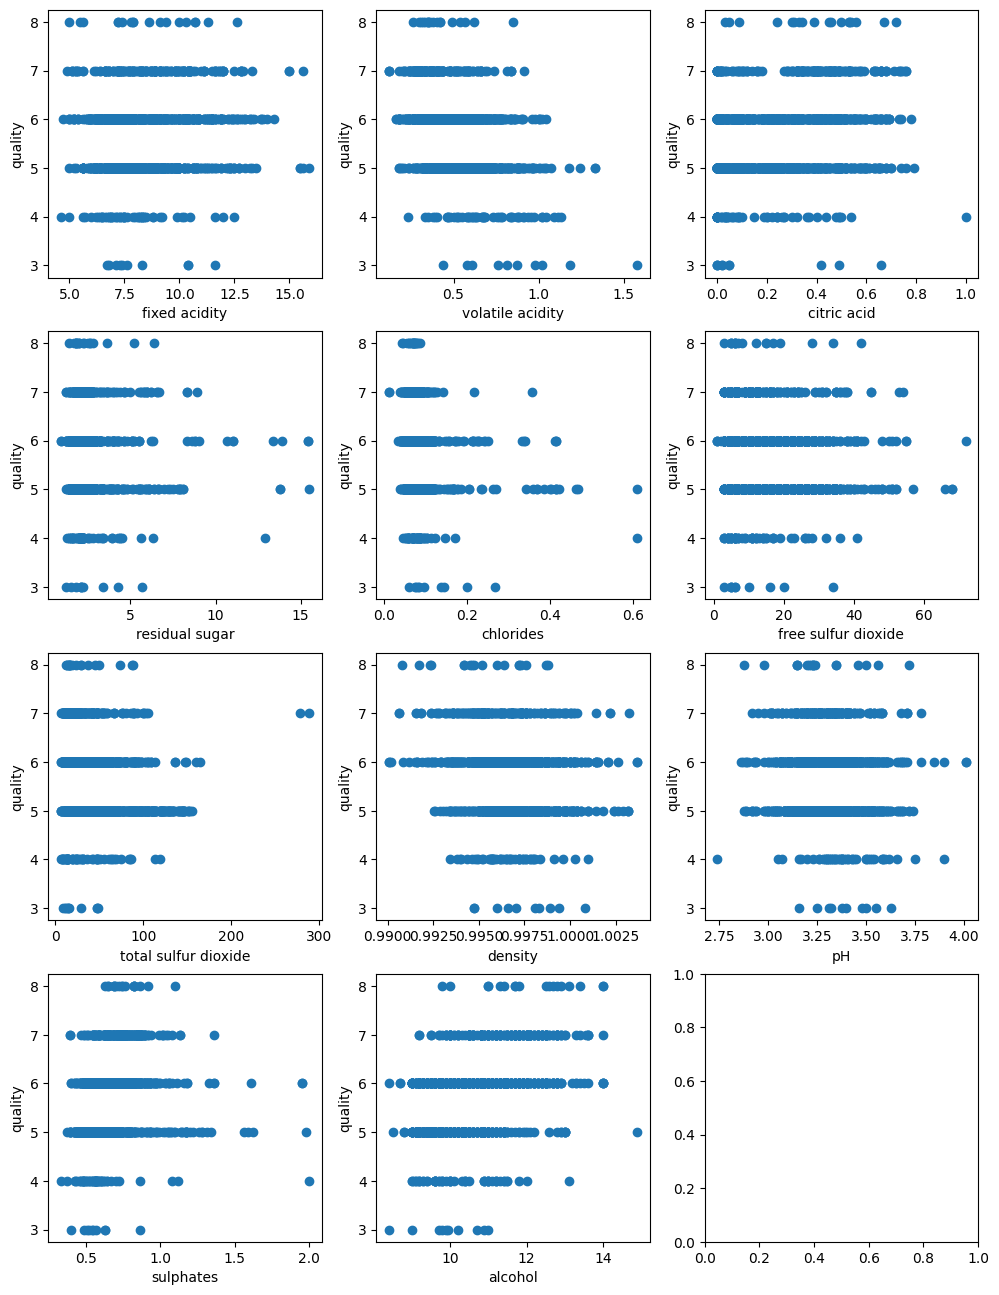

In [9]:
# Define the number of rows and columns for the subplot grid
nrow = 4
ncol = 3

# Create a figure and an array of subplots with the specified number of rows and columns
fig, axs = plt.subplots(nrow, ncol, figsize=(4 * ncol, 4 * nrow))

# Iterate over each subplot in the grid
for i in range(nrow):
    for j in range(ncol):
        # Check if it's the last subplot
        if i == nrow - 1 and j == ncol - 1:
            break  # Exit the loop if it's the last subplot

        # Plot a scatter plot in the current subplot using data from data_X and data_Y
        axs[i][j].scatter(data_X.iloc[:, i * ncol + j], data_Y)

        # Set labels for the x-axis and y-axis of the current subplot
        axs[i][j].set_xlabel(data_X.columns[i * ncol + j])
        axs[i][j].set_ylabel("quality")


There is no clear linear relationship between any of these variable and our target but alcohol and volatile acidity are somewhat linear with quality

<Axes: >

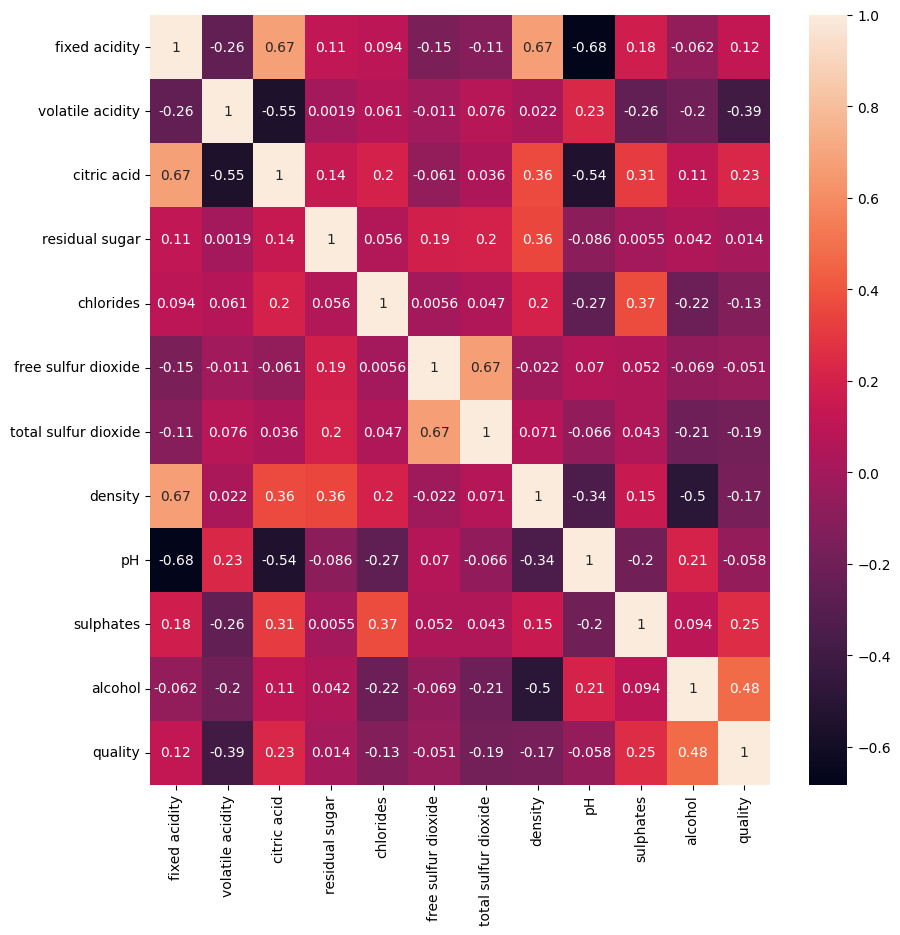

In [10]:
# Create a figure with a specified size
fig = plt.figure(figsize=(10, 10))

# Calculate the correlation matrix of the data
corr = data.corr()

# Create a heatmap of the correlation matrix using seaborn
sns.heatmap(corr, annot=True)


## Set up Independent and dependent variables



In [11]:
# Extracting independent variables: all columns except the last one
X = pd.DataFrame(data.iloc[:,:-1])

# Extracting dependent variable: only the last column
Y = pd.DataFrame(data.iloc[:,-1])


### Check our X  Data


In [12]:
X.head(n=5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


### Check our Y Data

In [13]:
Y.head(n=5)

,quality
0,5
1,5
2,5
3,6
4,5


### Split the data into train and test data sets

In [14]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)


### Shape of Train and Test Sets

In [15]:
print("X Train shape ", X_train.shape)
print("X Test shape  ", X_test.shape)
print("y Train shape ", y_train.shape)
print("y Test shape  ", y_test.shape)

X Train shape  (1279, 11)
X Test shape   (320, 11)
y Train shape  (1279, 1)
y Test shape   (320, 1)


### Train a Multiple Linear Regression Model

In [16]:
# Creating a linear regression model object
regressor = LinearRegression()

# Fitting the model to the training data
regressor.fit(X_train, y_train)


LinearRegression()

In [17]:
regressor.coef_

array([[ 4.79622779e-02, -1.11840142e+00, -2.76227524e-01,
         2.04756941e-02, -1.76890728e+00,  5.34980397e-03,
        -3.44870744e-03, -3.67102234e+01, -3.47701478e-01,
         9.29729469e-01,  2.66278221e-01]])

### Review the Regression coefficients

In [18]:
# Creating a DataFrame for coefficients
v = pd.DataFrame(regressor.coef_, index=["Co-efficient"]).transpose()

# Creating a DataFrame for attribute names
w = pd.DataFrame(X.columns, columns=['Attribute'])


In [19]:
# Concatenating DataFrames w and v along the columns axis (axis=1)
coeff_df = pd.concat([w, v], axis=1, join='inner')
coeff_df

,Attribute,Co-efficient
0,fixed acidity,0.047962
1,volatile acidity,-1.118401
2,citric acid,-0.276228
3,residual sugar,0.020476
4,chlorides,-1.768907
5,free sulfur dioxide,0.005350
6,total sulfur dioxide,-0.003449
7,density,-36.710223
8,pH,-0.347701
9,sulphates,0.929729


### Compare Predicted Value with Actuals

In [20]:
y_test.head(n=10)

,quality
75,5
1283,6
408,6
1281,6
1118,6
1143,6
1215,6
181,5
1186,5
1252,5


In [21]:
# Making predictions on the test set
y_pred = regressor.predict(X_test)

# Creating a DataFrame for the predicted values
y_pred = pd.DataFrame(y_pred, columns=['Predicted'])

# Displaying the first 10 predicted values
y_pred.head(n=10)


,Predicted
0,5.536655
1,5.375703
2,6.099949
3,5.727178
4,6.688794
5,5.971690
6,6.195016
7,5.094996
8,5.785604
9,5.160512


### Evaluate the model

In [22]:
import numpy as np
print("Mean Absolute Error", metrics.mean_absolute_error(y_test,y_pred))
print("Mean Squared Error", metrics.mean_squared_error(y_test,y_pred))
print("Root Mean Squared  Error", np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
print("R Squared", metrics.r2_score(y_true=y_test,y_pred=y_pred))

Mean Absolute Error 0.47482985287630336
Mean Squared Error 0.3830719815814285
Root Mean Squared  Error 0.6189280908000772
R Squared 0.326640272698682


## USING OLS from stats model


In [23]:
# Creating an Ordinary Least Squares (OLS) model with training data
ols_model = sm.OLS(y_train, X_train)

# Fitting the OLS model to the training data
ols_results = ols_model.fit()


In [24]:
print(ols_results.summary())

                                 OLS Regression Results                                
Dep. Variable:                quality   R-squared (uncentered):                   0.987
Model:                            OLS   Adj. R-squared (uncentered):              0.987
Method:                 Least Squares   F-statistic:                              8687.
Date:                Fri, 31 May 2024   Prob (F-statistic):                        0.00
Time:                        13:06:28   Log-Likelihood:                         -1270.5
No. Observations:                1279   AIC:                                      2563.
Df Residuals:                    1268   BIC:                                      2620.
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
                           coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------

## TEST Concept of R Squared and Adjusted R  Squared

In [25]:
#from sklearn.datasets import load_boston


#### Create Arbitrary Random data columns in X data

In [26]:
# Setting the random seed to ensure reproducibility
np.random.seed(11)

# Generating random data and adding it as new columns to the DataFrame X
X['random1'] = np.random.randn(len(X))    # Adding random data from a standard normal distribution
X['random2'] = np.random.randint(len(X))  # Adding random integers
X['random3'] = np.random.normal(len(X))   # Adding random data from a normal distribution with mean 0 and standard deviation 1


### Check Mutual Info value


In [27]:
# Calculating mutual information between features in X and target variable Y
mutual_info = mutual_info_regression(X, Y, discrete_features=X.dtypes == np.int32)

# Creating a Series to hold mutual information values with feature names as index
mutual_info = pd.Series(mutual_info, index=X.columns)

# Sorting the Series in descending order of mutual information values
mutual_info.sort_values(ascending=False, inplace=True)
mutual_info

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


alcohol                 0.179032
volatile acidity        0.119573
sulphates               0.098630
density                 0.075478
total sulfur dioxide    0.073659
chlorides               0.058482
citric acid             0.054428
pH                      0.036900
free sulfur dioxide     0.027086
residual sugar          0.026165
fixed acidity           0.024374
random1                 0.013715
random2                 0.011367
random3                 0.000313
dtype: float64

### Observation from above


In the above mutual information scores, we can see that alcohol and volatile acidity have a strong relationship with the target variable and the three random features that we added have no relationship with the target.

We’ll use these mutual information scores and incrementally add one feature at a time to the model (in the same order) and record the R-squared and adjusted R-squared scores.


### Incremental addition of features to model and finding R sqd and Adjusted R squared

In [28]:
result_df = []
for i in range(1, len(mutual_info) + 1):  # Iterating over the number of features
    X_new = X_train.iloc[:, :i].copy()  # Selecting the first i features from the training data
    linear_regression = LinearRegression()  # Creating a linear regression model
    linear_regression.fit(X_new, y_train)  # Fitting the model to the training data

    prediction = linear_regression.predict(X_test.iloc[:, :i].copy())  # Making predictions on the test data
    r2 = r2_score(y_true=y_test, y_pred=prediction)  # Calculating R-squared
    adj_r2 = 1 - ((1 - r2) * (len(X) - 1) / (len(X) - i - 1))  # Calculating adjusted R-squared

    # Appending the R-squared and adjusted R-squared values to the result DataFrame
    result_df.append([r2, adj_r2])

result_df = pd.DataFrame(result_df, columns=['r2','adj_r2'])


#### Plot scatter of X with Y and y pred

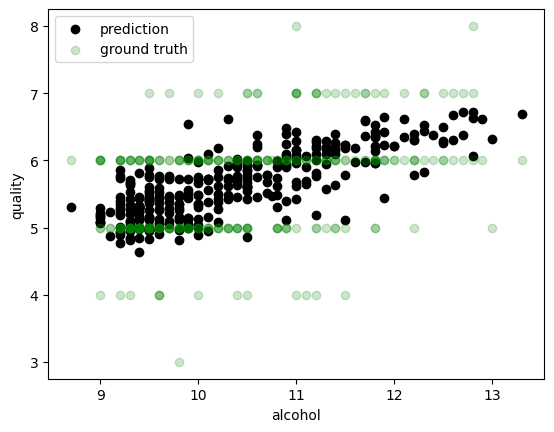

In [29]:
# Selecting feature 'alcohol' from the test set as X
X = X_test['alcohol']

# Assigning predicted values to Y1
Y1 = y_pred

# Assigning actual values to Y2
Y2 = y_test

# Creating a scatter plot
plt.scatter(X, Y1, color='k', label='prediction')  # Plotting predicted values in black
plt.scatter(X, Y2, color='g', alpha=0.2, label='ground truth')  # Plotting actual values in green with transparency
plt.xlabel('alcohol')  # X-axis label
plt.ylabel('quality')  # Y-axis label
plt.legend()  # Displaying legend
plt.show()  # Showing the plot


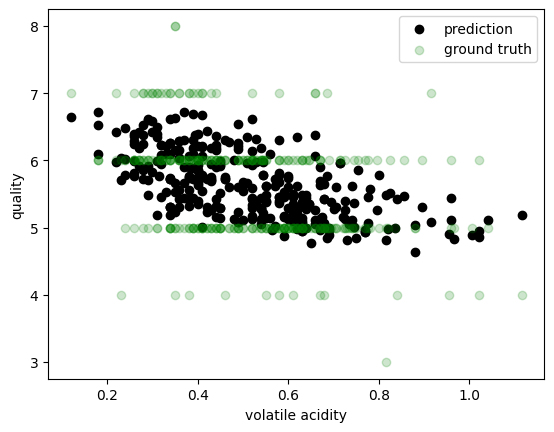

In [30]:
# Selecting feature 'alcohol' from the test set as X
X = X_test['volatile acidity']

# Assigning predicted values to Y1
Y1 = y_pred

# Assigning actual values to Y2
Y2 = y_test

# Creating a scatter plot
plt.scatter(X, Y1, color='k', label='prediction')  # Plotting predicted values in black
plt.scatter(X, Y2, color='g', alpha=0.2, label='ground truth')  # Plotting actual values in green with transparency
plt.xlabel('volatile acidity')  # Incorrect x-axis label
plt.ylabel('quality')  # Y-axis label
plt.legend()  # Displaying legend
plt.show()  # Showing the plot


Even though the prediction and the ground truth does not seem to fit each other, they are somewhat following the positive linear relationship between alcohol and quality or volatile acidity and quality. <br>
Because the quality ground truth values are integer but our prediction are float, so it doesn't really fit but we might be able to improve the result by rounding the prediction.

In [31]:
import numpy as np
print("Mean Absolute Error", metrics.mean_absolute_error(y_test,y_pred))
print("Mean Squared Error", metrics.mean_squared_error(y_test,y_pred))
print("Root Mean Squared  Error", np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
print("R Squared", metrics.r2_score(y_true=y_test,y_pred=y_pred))

Mean Absolute Error 0.47482985287630336
Mean Squared Error 0.3830719815814285
Root Mean Squared  Error 0.6189280908000772
R Squared 0.326640272698682


As we can see, mean absolute errors is better but other metrics are worse. So the prediction and ground doesn't seem to fit each other